# LeNet implementation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras import backend as K
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Dense, Activation, Flatten, Dropout
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import to_categorical
np.random.seed(1671)

/Users/tari/anaconda3/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
class LeNet:
    @staticmethod
    def build(input_shape, classes):
        model = Sequential()
        #Conv -> ReLU -> Pool
        model.add(Convolution2D(20, kernel_size=5, padding='same', input_shape=input_shape))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
        #Conv -> ReLU -> Pool
        model.add(Convolution2D(50, kernel_size=5, border_mode='same'))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
        #Flatten -> ReLU layers
        model.add(Flatten())
        model.add(Dense(500))
        model.add(Activation('relu'))
        #a softmax classifier
        model.add(Dense(classes))
        model.add(Activation('softmax'))
        return model

In [3]:
NB_EPOCH = 5
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10
OPTIMIZER = Adam()
IMG_ROWS, IMF_COLS = 28, 28
INPUT_SHAPE = (1, IMG_ROWS, IMF_COLS)
VALIDATION_SPLIT = 0.2
(X_train, y_train), (X_test, y_test) = mnist.load_data()
K.set_image_dim_ordering('th')
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= X_train/255
X_test /= X_test/255
X_train = X_train[:,np.newaxis,:,:]
X_test = X_test[:,np.newaxis,:,:]
print(X_train.shape[0], ' training samples')
print(X_test.shape[0], ' testing samples')

60000  training samples
10000  testing samples


/Users/tari/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
/Users/tari/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


In [4]:
y_train = to_categorical(y_train, NB_CLASSES)
y_test = to_categorical(y_test, NB_CLASSES)

In [5]:
model = LeNet.build(input_shape=INPUT_SHAPE, classes=NB_CLASSES)
model.compile(loss="categorical_crossentropy", optimizer=OPTIMIZER,
              metrics=['accuracy'])

/Users/tari/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(50, padding="same", kernel_size=5)`
  # Remove the CWD from sys.path while we load stuff.


In [6]:
history= model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=NB_EPOCH,
                  verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 347s 7ms/step - loss: nan - acc: 0.0985 - val_loss: nan - val_acc: 0.0995
Epoch 2/5
48000/48000 [==============================] - 362s 8ms/step - loss: nan - acc: 0.0985 - val_loss: nan - val_acc: 0.0995
Epoch 3/5
48000/48000 [==============================] - 328s 7ms/step - loss: nan - acc: 0.0985 - val_loss: nan - val_acc: 0.0995
Epoch 4/5
48000/48000 [==============================] - 320s 7ms/step - loss: nan - acc: 0.0985 - val_loss: nan - val_acc: 0.0995
Epoch 5/5
48000/48000 [==============================] - 351s 7ms/step - loss: nan - acc: 0.0985 - val_loss: nan - val_acc: 0.0995


In [7]:
score = model.evaluate(X_test, y_test, verbose=VERBOSE)
print('Test score {}'.format(score[0]))
print('Test accuracy {}'.format(score[1]))

10000/10000 [==============================] - 32s 3ms/step
Test score nan
Test accuracy 0.098


## Ploting Loss and Accuracy for train and test

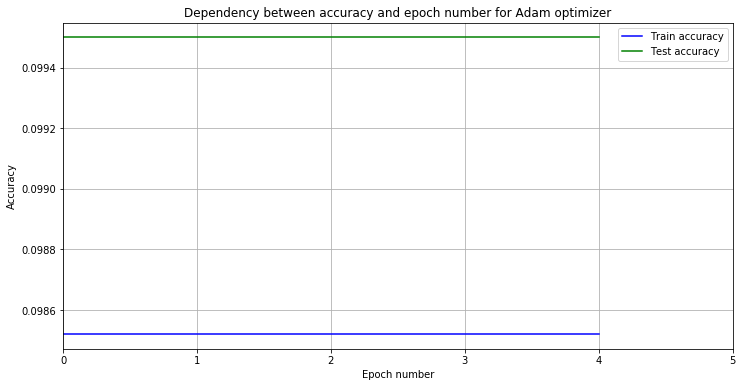

In [10]:
plt.figure(figsize=(12,6))
plt.plot(history.history['acc'], color = 'blue', label = 'Train accuracy')
plt.plot(history.history['val_acc'], color = 'green', label = 'Test accuracy')
plt.xlabel('Epoch number')
plt.ylabel('Accuracy')
plt.xlim(0,5)
plt.title('Dependency between accuracy and epoch number for Adam optimizer')
plt.grid()
plt.legend()

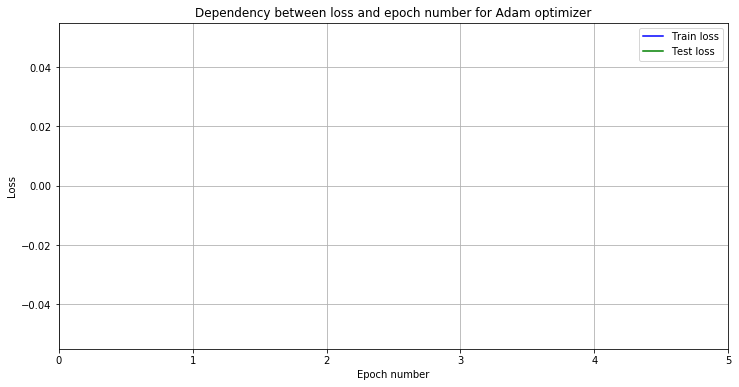

In [11]:
plt.figure(figsize=(12,6))
plt.plot(history.history['loss'], color = 'blue', label = 'Train loss')
plt.plot(history.history['val_loss'], color = 'green', label = 'Test loss')
plt.xlabel('Epoch number')
plt.xlim(0,5)
plt.ylabel('Loss')
plt.title('Dependency between loss and epoch number for Adam optimizer')
plt.grid()
plt.legend()

# Visualization

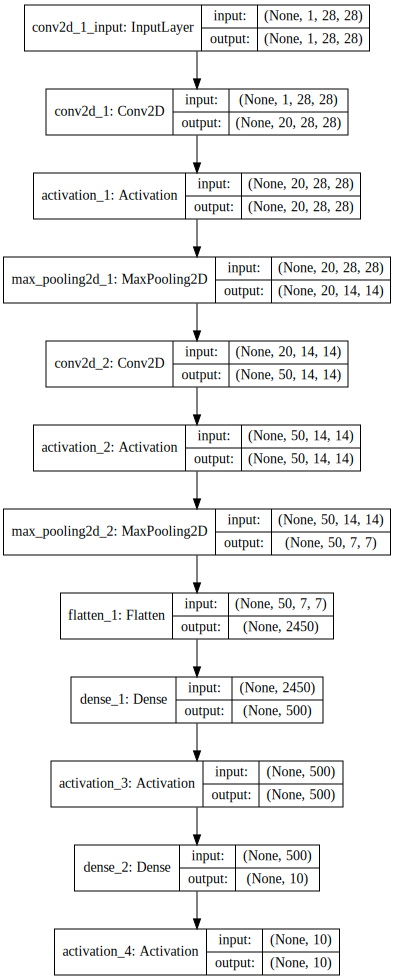

In [12]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model, show_shapes=True, show_layer_names=True).create(prog='dot', format='svg'))

In [13]:
from quiver_engine import server
server.launch(model,temp_folder='./', port=9999)

Starting webserver from: /Users/tari/anaconda3/lib/python3.5/site-packages/quiver_engine


::1 - - [2018-03-16 15:00:14] "GET /model HTTP/1.1" 200 5283 0.007118
::1 - - [2018-03-16 15:00:14] "GET /inputs HTTP/1.1" 200 168 0.002655
::1 - - [2018-03-16 15:00:14] "GET /input-file/First_Net_Model.png HTTP/1.1" 200 24027 0.020799
::1 - - [2018-03-16 15:01:52] "GET / HTTP/1.1" 304 239 0.013066
::1 - - [2018-03-16 15:01:53] "GET /model HTTP/1.1" 200 5283 0.009141
::1 - - [2018-03-16 15:01:53] "GET /inputs HTTP/1.1" 200 187 0.002276
::1 - - [2018-03-16 15:01:53] "GET /input-file/cat.4001.jpg HTTP/1.1" 200 47314 0.002708
::1 - - [2018-03-16 15:01:53] "GET /favicon.ico HTTP/1.1" 200 16195 0.006968
[2018-03-16 15:01:57,401] ERROR in app: Exception on /predict/cat.4001.jpg [GET]
Traceback (most recent call last):
  File "/Users/tari/anaconda3/lib/python3.5/site-packages/flask/app.py", line 1982, in wsgi_app
    response = self.full_dispatch_request()
  File "/Users/tari/anaconda3/lib/python3.5/site-packages/flask/app.py", line 1614, in full_dispatch_request
    rv = self.handle_user_exc

::1 - - [2018-03-16 15:02:02] "GET /layer/max_pooling2d_1/cat.4001.jpg HTTP/1.1" 500 444 0.010042
[2018-03-16 15:02:03,683] ERROR in app: Exception on /layer/conv2d_2/cat.4001.jpg [GET]
Traceback (most recent call last):
  File "/Users/tari/anaconda3/lib/python3.5/site-packages/flask/app.py", line 1982, in wsgi_app
    response = self.full_dispatch_request()
  File "/Users/tari/anaconda3/lib/python3.5/site-packages/flask/app.py", line 1614, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/Users/tari/anaconda3/lib/python3.5/site-packages/flask_cors/extension.py", line 161, in wrapped_function
    return cors_after_request(app.make_response(f(*args, **kwargs)))
  File "/Users/tari/anaconda3/lib/python3.5/site-packages/flask/app.py", line 1517, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/Users/tari/anaconda3/lib/python3.5/site-packages/flask/_compat.py", line 33, in reraise
    raise value
  File "/Users/tari/anaconda3/lib/python3.5/site-

::1 - - [2018-03-16 15:02:06] "GET /layer/conv2d_2/cat.4001.jpg HTTP/1.1" 500 444 0.020018
[2018-03-16 15:02:09,449] ERROR in app: Exception on /layer/conv2d_1/cat.4001.jpg [GET]
Traceback (most recent call last):
  File "/Users/tari/anaconda3/lib/python3.5/site-packages/flask/app.py", line 1982, in wsgi_app
    response = self.full_dispatch_request()
  File "/Users/tari/anaconda3/lib/python3.5/site-packages/flask/app.py", line 1614, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/Users/tari/anaconda3/lib/python3.5/site-packages/flask_cors/extension.py", line 161, in wrapped_function
    return cors_after_request(app.make_response(f(*args, **kwargs)))
  File "/Users/tari/anaconda3/lib/python3.5/site-packages/flask/app.py", line 1517, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/Users/tari/anaconda3/lib/python3.5/site-packages/flask/_compat.py", line 33, in reraise
    raise value
  File "/Users/tari/anaconda3/lib/python3.5/site-package

KeyboardInterrupt: 